# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

# 2. Read in Data

In [9]:
# Read in data
df = pd.read_csv('Reviews_data.csv')

In [10]:
# display col, rol number
print(df.shape)
df = df.head(500)
print(df.shape)

(999, 10)
(500, 10)


In [11]:
# Dislay col, row
list(df.columns.values)

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

Id - Id của bảng

ProductId - id của sản phẩm

UserId - id của người dùng

ProfileName : tên của người dùng

HelpfulnessNumerator - số lượng người dùng thấy bài đánh giá hữu ích

HelpfulnessDenominator - số người dùng cho biết bài đánh giá hữu ích hay không

Score - điểm đánh giá từ 1-5

Time - thời gian đánh giá

Summary - tóm tắt về đánh giá

Text - đoạn đánh giá

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


# 3. Quick EDA

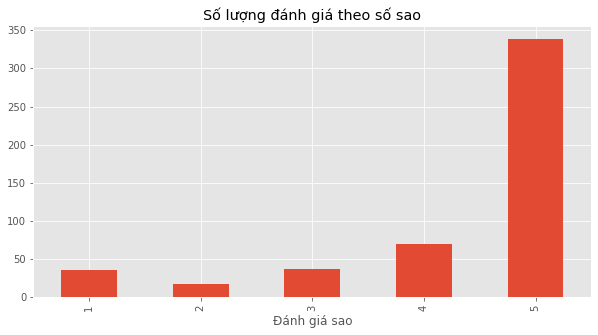

In [13]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Số lượng đánh giá theo số sao',
          figsize=(10, 5))
ax.set_xlabel('Đánh giá sao')
plt.show()

# 4. Basic NLTK

In [14]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [15]:
# chia các chuỗi thành các danh sách con 
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [16]:
# trình gắn thẻ POS , xử lý một chuỗi các từ và đính kèm một phần của thẻ lời nói vào mỗi từ
# https://www.guru99.com/pos-tagging-chunking-nltk.html
#Phần trình gắn thẻ - NN danh từ, số ít (mèo, cây)
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

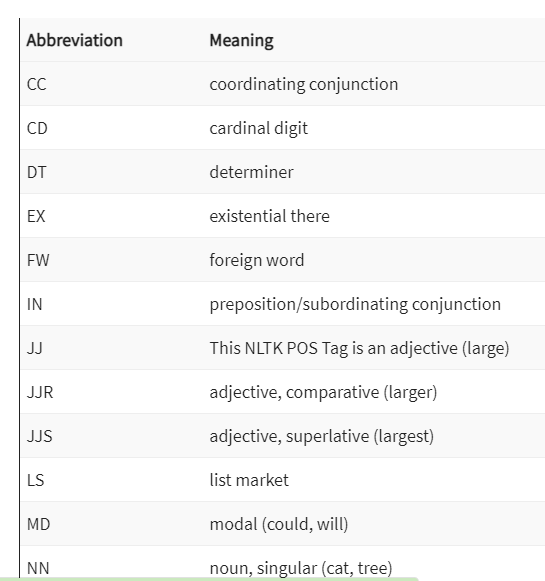

In [17]:
from IPython.display import Image
Image(filename='Pos_tag.png') 

In [18]:
# Tách thành các đoạn nhỏ
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# 5. Clean Data

In [19]:
import re
first_description=df.Text[0]
description=re.sub("[^a-zA-Z]"," ",first_description) 
description=description.lower()

In [20]:
print(df.Text[0])
print(description)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 


In [21]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0.0,0.0,5,1.201392e+09,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0.0,0.0,5,1.196726e+09,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0.0,0.0,4,1.186618e+09,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0.0,0.0,4,1.184198e+09,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [22]:
df.dtypes

Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator      float64
HelpfulnessDenominator    float64
Score                       int64
Time                      float64
Summary                    object
Text                       object
dtype: object

In [23]:
df.shape

(500, 10)

In [24]:
df.isna().sum()

Id                         0
ProductId                 22
UserId                     0
ProfileName                0
HelpfulnessNumerator      36
HelpfulnessDenominator    36
Score                      0
Time                      14
Summary                    0
Text                      20
dtype: int64

In [25]:
df.dropna(inplace = True)

In [26]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [27]:
df.shape

(423, 10)

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [30]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(422, 10)

In [31]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5,1.107821e+09,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
252,253,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0.0,0.0,1,1.344557e+09,Sad outcome,"Five minutes in, one tentacle was bitten off, ..."
187,188,B00029XIZI,A2S72TUJDQUBMH,Nadia,0.0,0.0,5,1.236125e+09,Miracle,My Scotties were full of hot spots and when I ...
350,351,B00067AD4U,A7DSY3M6P6RG3,taza052007,0.0,0.0,5,1.181693e+09,These are the Best!,These chocolate covered espresso beans are won...
349,350,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum ""expresso bean fan""",1.0,1.0,5,1.178928e+09,excellent - exactly what I expected,The product was exactly as advertised and fres...
...,...,...,...,...,...,...,...,...,...,...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
173,174,B0081XN2HQ,A3HUV0ZQPXO3V7,Pink Dandy Chatter,0.0,0.0,5,1.344902e+09,"Fluffy, Soft, Delicious and Sugary Sweet",I couldn't wait to try the 8&#8243; Cinnamon C...
257,258,B00821UN4M,A332AAPB4P75L4,Heather Crimson,2.0,2.0,1,1.348099e+09,Reeks like chemicals,I so wish I would have read this review before...
258,259,B00821UN4M,A3MQSTAAJSUGF9,mommy11,1.0,1.0,2,1.345162e+09,Disappointed!,This product has a strong after-taste of Crayo...


# 6. Vader Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) là một công cụ phân tích cảm xúc dựa trên quy tắc và từ vựng, đặc biệt phù hợp với cảm xúc được thể hiện trên mạng xã hội .

Sử dụng tình cảm của NLTK để có được điểm số NEG/NEU/POS của văn bản.

- Điều này sử dụng cách tiếp cận "bag of words": 
+ stop words được xóa

+ Mỗi từ score và kết hợp với total score.

=> lấy tất cả các từ trong câu và nó có thể có giá trị một là tich cực/ tiêu cực/trung lập cho mỗi từ đó
.Tiếp theo là kết hợp nó lại với nhau và nó sẽ thực hiện phương trình toán học. Đối với tất cả các từ nó sẽ cộng lại để cho bạn biết mức độ tích cực hay tiêu cực hay trung lập

In [105]:
# final = pd.read_csv('Reviews_data_2.csv')
# #print(df4.shape)
# #df4 = df4.head(500)
# print(df4.shape)

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [34]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [35]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [36]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [37]:
# Chạy điểm phân cực trên toàn bộ tập dữ liệu
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/423 [00:00<?, ?it/s]

In [38]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [39]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [40]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [48]:
# Bây giờ có điểm số tình cảm và dữ liệu sau khi hợp nhất
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


Kết quả biểu đồ Vader

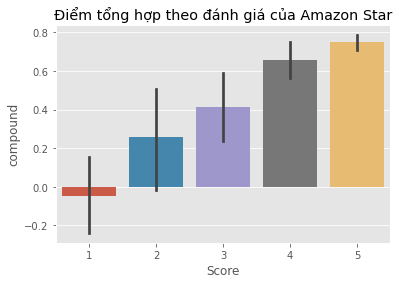

In [41]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Điểm tổng hợp theo đánh giá của Amazon Star')
plt.show()

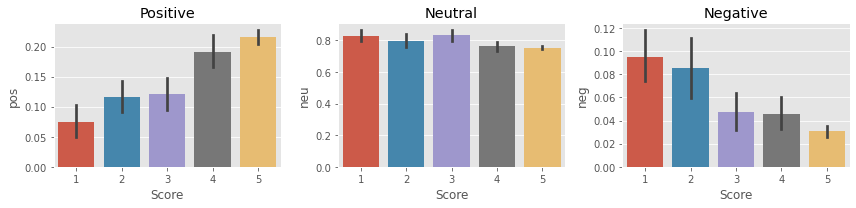

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()